In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
X_1 = pd.read_csv('/content/data1.csv')
X_2 = pd.read_csv('/content/data2.csv')
X_3 = pd.read_csv('/content/data3.csv')
X_temp = pd.merge(X_1, X_3, on = ['id','Track Name'], how = 'inner')
X = pd.merge(X_temp, X_2, on = 'id', how = 'inner')

In [ ]:
X_1a = pd.read_csv('/content/data1_test.csv')
X_2a = pd.read_csv('/content/data2_test.csv')
X_3a = pd.read_csv('/content/data3_test.csv')
X_temp = pd.merge(X_1a, X_3a, on = ['id','Track Name'], how = 'inner')
Xa = pd.merge(X_temp, X_2a, on = 'id', how = 'inner')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
Xa['Track Name'] = le.fit_transform(Xa[['Track Name']])
X['Track Name'] = le.fit_transform(X[['Track Name']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y = X.Class

In [ ]:
X.drop(['Class'], axis = 1, inplace = True)

In [ ]:
X.shape

(6053, 17)

In [ ]:
X.head()

,id,Artist Name,Track Name,Popularity,duration,key,mode,time_signature,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0,BrMa,0,60.0,234.596,1.0,major,type 4,0.854745,0.563472,0.873150,0.027152,0.017169,NaN,0.070304,0.911981,0.558039
1,1,De,0,66.0,173.968,10.0,minor,type 4,0.853669,0.596512,0.834119,0.034664,0.021285,NaN,0.107996,0.570260,0.412278
2,2,DuAh,0,14.0,164.093,1.0,minor,type 4,0.706262,0.884861,0.888523,0.010839,0.061647,NaN,0.241085,0.843637,0.525542
3,3,EyGo,0,34.0,206.875,1.0,minor,type 4,0.565311,0.380250,0.806818,0.024791,0.436747,NaN,0.112059,0.314487,0.610897
4,4,HaLaBrdeLo,0,34.0,266.415,11.0,minor,type 3,0.432968,0.373242,0.695840,0.010625,0.952811,0.932731,0.117139,0.161230,0.498027


While doing EDA, we realise most of the column with `dtypes == 'object'` correlations are below 0.01. Therefore, we decided to drop them, except for `'feature_7'`.

# PREPROCESSING

## OUTLIER HANDLING

### Train

In [ ]:
# selecting Columns with int and float dtypes only

l = X.select_dtypes(include=['object'])
a = X.drop(l, axis =1)
a.head()

,id,Track Name,Popularity,duration,key,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0,0,60.0,234.596,1.0,0.854745,0.563472,0.873150,0.027152,0.017169,NaN,0.070304,0.911981,0.558039
1,1,0,66.0,173.968,10.0,0.853669,0.596512,0.834119,0.034664,0.021285,NaN,0.107996,0.570260,0.412278
2,2,0,14.0,164.093,1.0,0.706262,0.884861,0.888523,0.010839,0.061647,NaN,0.241085,0.843637,0.525542
3,3,0,34.0,206.875,1.0,0.565311,0.380250,0.806818,0.024791,0.436747,NaN,0.112059,0.314487,0.610897
4,4,0,34.0,266.415,11.0,0.432968,0.373242,0.695840,0.010625,0.952811,0.932731,0.117139,0.161230,0.498027


In [ ]:
# define the functoin to drop the outliers using Z-Score
def detect_outliers_zscore_with_indices(data, threshold=6):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)[0]
    return outliers, data.index[outliers]

In [ ]:
#knowing how many rows to be dropped due to outliers
len(detect_outliers_zscore_with_indices(a, threshold=6)[1])

21

In [ ]:
# dropping rows with outliers
k = detect_outliers_zscore_with_indices(a, threshold=6)[1]

In [ ]:
# adjusting rows with y data
X = X.drop(k, axis=0)
c = X.index
y = y[c]

## MISSING VALUE HANDLING

### Train

In [ ]:
X.isnull().sum()/len(X)

id                0.000000
Artist Name       0.000000
Track Name        0.000000
Popularity        0.026525
duration          0.000000
key               0.116048
mode              0.000000
time_signature    0.000000
feature_1         0.029841
feature_2         0.000000
feature_3         0.028017
feature_4         0.000000
feature_5         0.000000
feature_6         0.410809
feature_7         0.000000
feature_8         0.049735
feature_9         0.030007
dtype: float64

In [ ]:
# checking the distribution of each column whose values are missing to execute the missing value handling
for i in ['Popularity','feature_1', 'feature_6', 'feature_3','feature_8','feature_9']:
  plt.hist(X[i])
  plt.title(i)
  plt.show()

In [ ]:
#for feature_6 and feature_3, median is used.
X['feature_6']=X['feature_6'].fillna(X['feature_6'].median())
X['feature_3']=X['feature_3'].fillna(X['feature_3'].median())


#for feature_1, feature_8, feature_9, mean is used.
X['feature_1']=X['feature_1'].fillna(X['feature_1'].mean())
X['feature_8']=X['feature_8'].fillna(X['feature_8'].mean())
X['feature_9']=X['feature_9'].fillna(X['feature_9'].mean())

In [ ]:
#for Popularity since it is a decrete value, we are using KNNImputer.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)
X['Popularity'] = imputer.fit_transform(X[['Popularity']])

In [ ]:
X.shape

(6032, 17)

## ENCODING

### Train and Test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Track Name'] = le.fit_transform(X[['Track Name']])
Xa['Track Name'] = le.fit_transform(Xa[['Track Name']])

Xa.columns = Xa.columns.astype(str)
X.columns = X.columns.astype(str)

In [ ]:
X.shape

(6032, 17)

## SCALING

### Train and test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['Popularity', 'duration']] = scaler.fit_transform(X[['Popularity', 'duration']])
Xa[['Popularity', 'duration']] = scaler.transform(Xa[['Popularity', 'duration']])



---



Finally, 12 features are chosen:

In [ ]:
features = ['Popularity','duration', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9']

In [ ]:
X.shape

(6032, 17)

# Train

In [ ]:
X_fix = X[features]
X_fix.shape

(6032, 11)

In [ ]:
X_fix.head()

,Popularity,duration,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.595960,0.301564,0.854745,0.563472,0.873150,0.027152,0.017169,0.003945,0.070304,0.911981,0.558039
1,0.656566,0.212158,0.853669,0.596512,0.834119,0.034664,0.021285,0.003945,0.107996,0.570260,0.412278
2,0.131313,0.197596,0.706262,0.884861,0.888523,0.010839,0.061647,0.003945,0.241085,0.843637,0.525542
3,0.333333,0.260685,0.565311,0.380250,0.806818,0.024791,0.436747,0.003945,0.112059,0.314487,0.610897
4,0.333333,0.348486,0.432968,0.373242,0.695840,0.010625,0.952811,0.932731,0.117139,0.161230,0.498027


# Test

In [ ]:
Xa_fix = Xa[features]
Xa_fix.shape

(750, 11)

In [ ]:
Xa_fix.head()

,Popularity,duration,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.343434,0.311126,0.714870,0.531433,0.744229,0.039064,0.157631,0.023393,0.689119,0.453246,0.536206
1,0.121212,0.365258,0.639552,0.606524,0.796212,0.017386,0.000177,0.867470,0.243117,0.497774,0.611248
2,0.202020,0.391632,0.553475,0.988987,0.859524,0.034342,0.000282,0.266064,0.129330,0.163301,0.536443
3,0.757576,0.262382,0.694427,0.372240,0.770782,0.016313,0.725904,0.813253,0.277659,0.551621,0.482431
4,0.474747,0.360380,0.671831,0.658587,0.854458,0.000215,0.027108,0.000005,0.136442,0.311380,0.429131




---



# MODELLING

## SVM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 20, 21, 25, 30],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel function
    'gamma': [0.1, 1, 5, 10],  # Kernel coefficient (only for 'rbf' kernel)
}

# Create the SVM classifier
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_fix, y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_


print("Best Parameters :", best_params)

my_model = SVC(**best_params)
my_model.fit(X_fix, y)
y_pred = my_model.predict(X_fix)
ya_pred = my_model.predict(Xa_fix)

### Accuration Train

In [ ]:
from sklearn.metrics import accuracy_score
print('ACCURACY TRAIN:  ', my_model.score(X_fix, y))

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred, average='macro'))
print(f1_score(y, y_pred, average='micro'))
print(f1_score(y, y_pred, average='weighted'))

## Sequential Deep Learning

Epoch 1/300
95/95 [==============================] - 10s 71ms/step - loss: 0.8880 - accuracy: 0.7551 - val_loss: 1.5101 - val_accuracy: 0.3934
Epoch 2/300
95/95 [==============================] - 6s 62ms/step - loss: 0.6091 - accuracy: 0.7946 - val_loss: 1.6240 - val_accuracy: 0.3934
Epoch 3/300
95/95 [==============================] - 7s 76ms/step - loss: 0.5768 - accuracy: 0.7977 - val_loss: 1.5245 - val_accuracy: 0.4138
Epoch 4/300
95/95 [==============================] - 7s 73ms/step - loss: 0.5481 - accuracy: 0.8049 - val_loss: 0.6576 - val_accuracy: 0.7399
Epoch 5/300
95/95 [==============================] - 7s 77ms/step - loss: 0.5276 - accuracy: 0.8065 - val_loss: 0.4695 - val_accuracy: 0.8244
Epoch 6/300
95/95 [==============================] - 6s 60ms/step - loss: 0.4880 - accuracy: 0.8155 - val_loss: 0.4220 - val_accuracy: 0.8334
Epoch 7/300
95/95 [==============================] - 9s 90ms/step - loss: 0.5018 - accuracy: 0.8143 - val_loss: 0.4082 - val_accuracy: 0.8442
Epoch

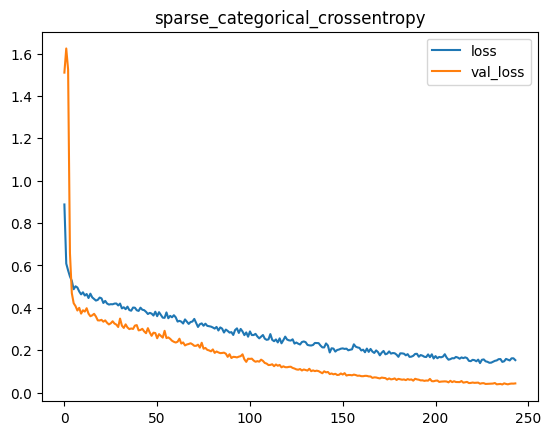

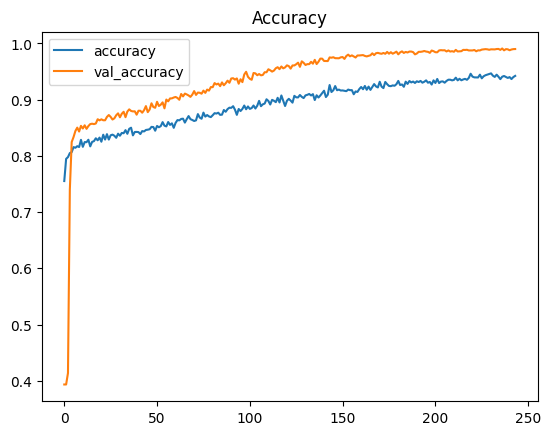

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

# Assuming y_train and y_val are your original integer-encoded labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# y_val_encoded = label_encoder.transform(y_val)

num_classes = len(np.unique(y_encoded))

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(units=1024, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1024, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1024, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(num_classes, activation='softmax')  # Adjusted to match the number of classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adjusted learning rate
    loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_fix, y_encoded,  # Using integer-encoded labels
    validation_data = (X_fix, y_encoded),
    batch_size=64,  # Adjusted batch size
    epochs=300,
    callbacks=[early_stopping]
)

# The rest of your code remains unchanged
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="sparse_categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
predictions = model.predict(Xa_fix)
# Get predictions
predictions = model.predict(Xa_fix)
predicted_classes = np.argmax(predictions, axis=1)

# Mapping between encoded classes and original values
class_mapping = {0: 4, 1: 6, 2: 8, 3: 9, 4: 10}

# Map the predicted classes to original values
predicted_original_classes = np.vectorize(class_mapping.get)(predicted_classes)

print(predicted_original_classes)

### Accuration of Train

In [ ]:
# Evaluate the model on the validation set
eval_results = model.evaluate(X_fix, y_encoded)

# Extract the accuracy from the evaluation results
accuracy = eval_results[1]  # Assuming accuracy is the second element in the results

print(f'Validation Accuracy: {accuracy}')

189/189 [==============================] - 1s 7ms/step - loss: 0.0392 - accuracy: 0.9899
Validation Accuracy: 0.9898872971534729


# SUBMISSION CODE

In [ ]:
# from google.colab import files
# output = pd.DataFrame({'id': Xa.id,
#                        'Class': ya_pred})

# # Assuming your data or results are in a DataFrame named 'df'
# output.to_csv('dataJanitor27.csv', index=False)  # Replace 'data.csv' with the desired file name

# files.download('dataJanitor27.csv')